Nro. de muestras:  30000
Frecuencia de muestreo:  10000
Periodo de muestreo:  0.0001
Frecuencia de Nyquist:  5000
Vector de tiempos discretizados: t= [0.0000e+00 1.0000e-04 2.0000e-04 ... 2.9997e+00 2.9998e+00 2.9999e+00]


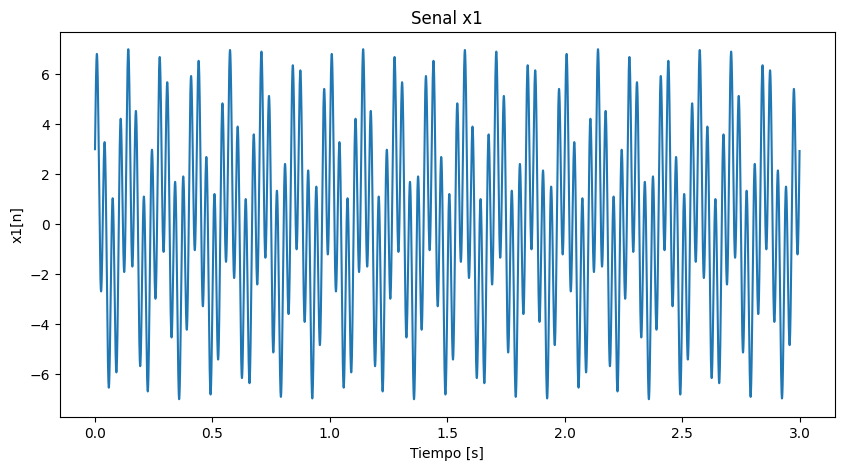

In [2]:
# Primero  se importan todas las librerías necesarias
import numpy as np 
from scipy.io.wavfile import read, write  #para leer y guardar archivos de audio formato wav
import matplotlib.pyplot as plt
from scipy.fftpack import fft,fftshift
from scipy import signal
import pywt

M = 30000 # numero de muestras
frM = (1*M)/3 # frecuencia de muestreo
              # se calcula usando una regla de 3 simple:
              # si en 3 segundos --- 30.000 muestras
              # entonces 1 s     --- x = frM 
pM = 1/frM # periodo de muestreo = 1 sobre frecuencia de muestreo
fNyquist = frM/2 # frecuencia de Nyquist es la frecuencia de muestreo / 2
# se muestran los datos por consola
print("Nro. de muestras: ", M)
print("Frecuencia de muestreo: ", int(frM))
print("Periodo de muestreo: ", pM)
print("Frecuencia de Nyquist: ", int(fNyquist))

# se define el vector de tiempos discretizados
t = np.arange(0,3,pM)

print("Vector de tiempos discretizados: t=", t)

# se define la señal x1
x1 = 4*np.sin(60*np.pi*t)+3*np.cos(14*np.pi*t)

# grafico la señal en funcion del tiempo
plt.figure(figsize=(10,5))
plt.title("Senal x1")
plt.xlabel("Tiempo [s]")
plt.ylabel("x1[n]")
plt.plot(t, x1, label="x1")

plt.show()


---

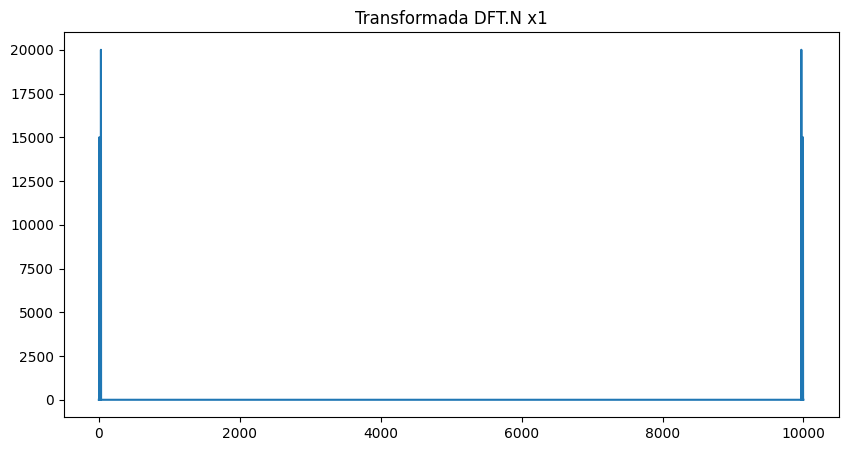

In [3]:
# se calcula l DFT.N solicitada
N = 10000 # se define el N para la DFT

ftx1 = fft(x1, N)

#   grafico la transformada para interpretar los resultados
plt.figure(figsize=(10,5))
plt.title("Transformada DFT.N x1")
plt.plot(abs(ftx1), label="x1")

plt.show()

Dado que el $N < M$, es decir que, el N de la DFT.N es mas chico que el numero de muestras, <span style='color:red'>**se produce un truncamiento**</span> de la informacion.

Esto ocurre porque, al muestrar menor cantidad de puntos de la transformada que de la senal original, se pierde informacion. Por lo tanto, si se deseara antitransformar, no se podria recuperar la totalidad de la senal.


---

In [4]:
x2 = read('./audio.wav')
#print(x2)

fm2=x2[0] # frecuencia de muestreo de la senal de audio
print("Frecuencia de muestreo: ", fm2, " [Hz]")

# dado que la senal x2 tiene un solo canal
au2 = x2[1]
#print(au2)
M2 = len(au2) # cantidad de muestras de la senal de audio
print("Cantidad de muestras: ", M2)
# para calcular la duracion de la senal se procede con una regla de tres simple
# si 10.000 muestras (fm2) --- 1s (ocurren en 1s)
# entonces 30.000 (M2) --- x (el total de muestras ocurren en x)
T = (M2*1)/fm2
print("Duracion de la senal: ", T, " [s]")

# se concatenan las senales resultantes
x3 = np.concatenate((x1,au2))


Frecuencia de muestreo:  10000  [Hz]
Cantidad de muestras:  30000
Duracion de la senal:  3.0  [s]


---

(45,)
(5001,)


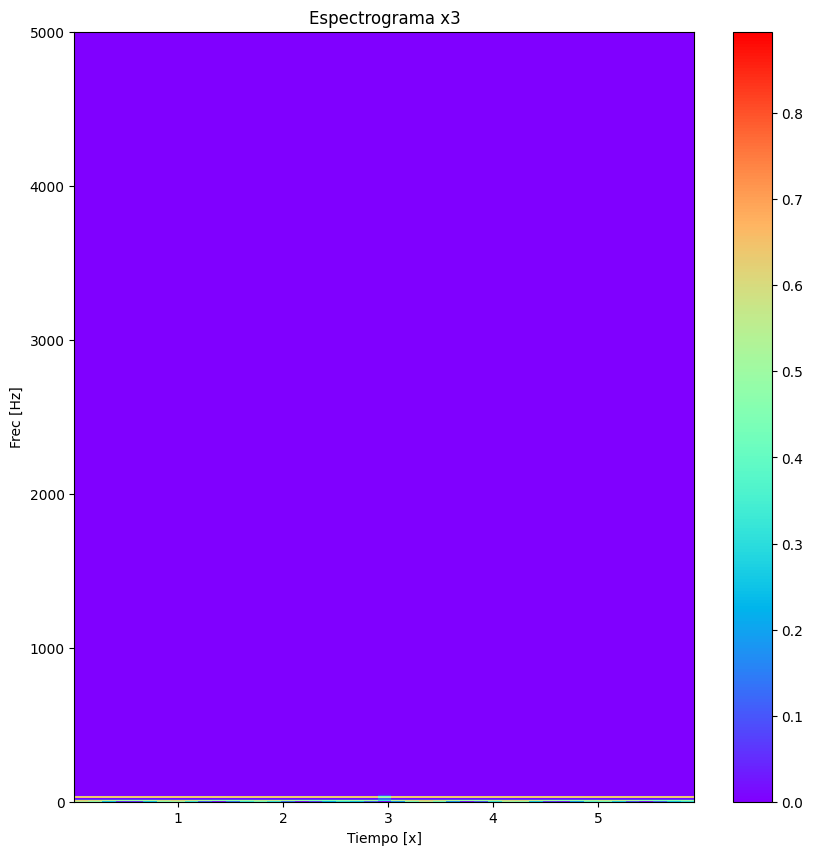

In [9]:
vent = signal.hamming(1500)

f1, t1, Sxx1 = signal.spectrogram(x3, fs=fm2, window=vent, nfft=N, noverlap=None)

plt.figure(figsize=(10,10))
plt.pcolormesh(t1,f1,Sxx1, cmap='rainbow')
plt.xlabel("Tiempo [x]")
plt.ylabel("Frec [Hz]")
plt.title("Espectrograma x3")
plt.colorbar()

print(t1.shape)
print(f1.shape)

Considero que la senal no es estacionaria, dado que en la parte inferior del espectrograma se ven bandas discontinuas frecuenciales. De ser bandas continuas, la senal seria estacionaria.

Como no es el caso, la senal es no estacionaria.


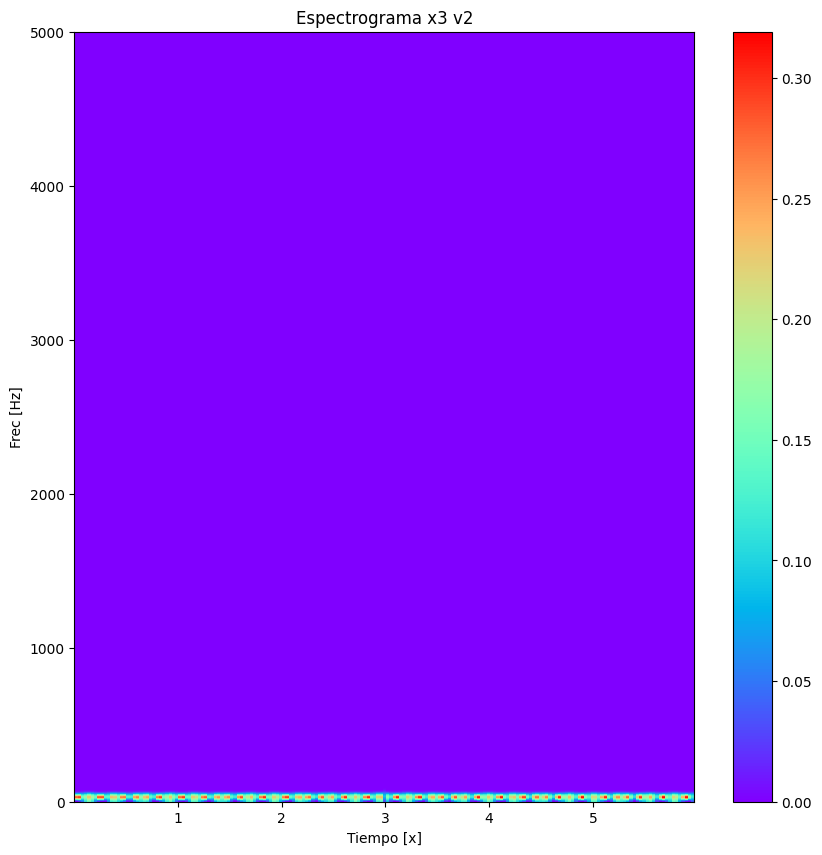

In [ ]:
# se realiza otro espectrograma
vent2 = signal.bartlett(333)

f2, t2, Sxx2 = signal.spectrogram(x3, fs=fm2, window=vent2, nfft=N, noverlap=20)

plt.figure(figsize=(10,10))
plt.pcolormesh(t2,f2,Sxx2, cmap='rainbow')
plt.xlabel("Tiempo [x]")
plt.ylabel("Frec [Hz]")
plt.title("Espectrograma x3 v2")
plt.colorbar()

En el siguiente espectrogrma se ve con mas claridad que no hay bandas continuas frecuenciales (ya que hay puntos en los que se ve claramente el color rojo o verde y hay cortes de color violeta), por lo que se concluye que la senal concatenada no es estacionaria.